In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('insurance.csv')


In [5]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [6]:
#EDA

In [7]:
df.shape

(1338, 7)

In [8]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe()#numeric values came

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [11]:
df.isnull().sum()#to check if there is null values present or not.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

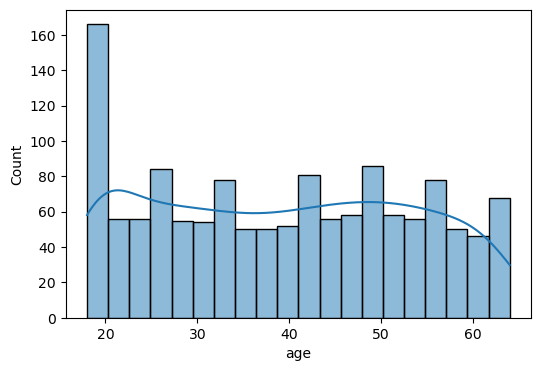

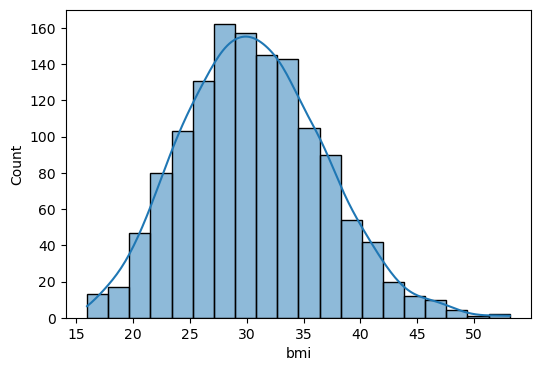

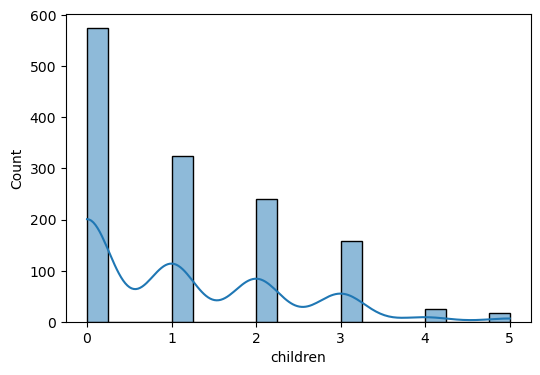

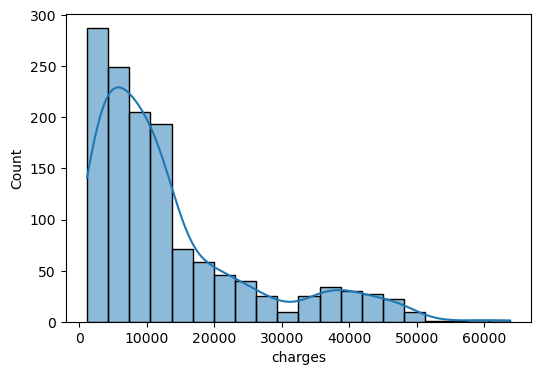

In [13]:
#select columns that are numeric.
numeric_columns=['age','bmi', 'children','charges']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True,bins=20)#kernel density estimation

<Axes: xlabel='children', ylabel='count'>

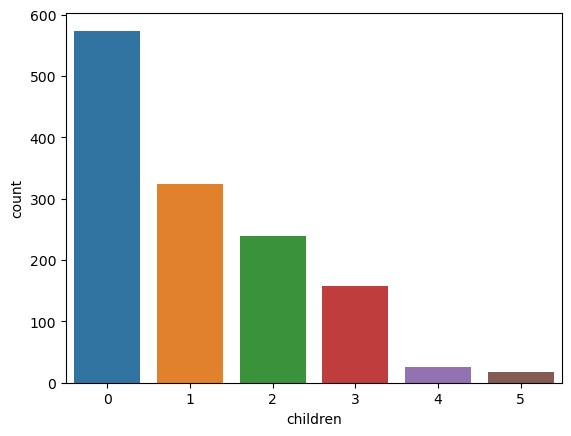

In [14]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

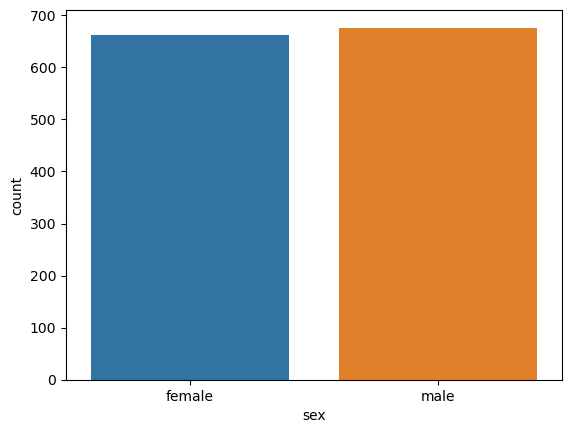

In [15]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

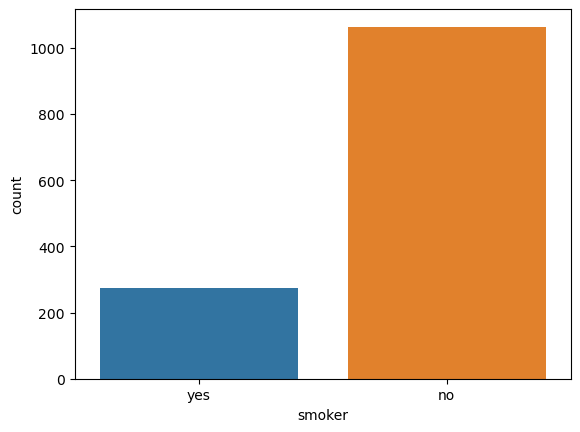

In [16]:
sns.countplot(x=df['smoker'])#insurance charges for smoker is more.

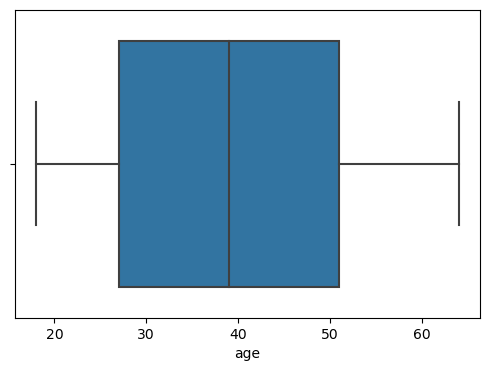

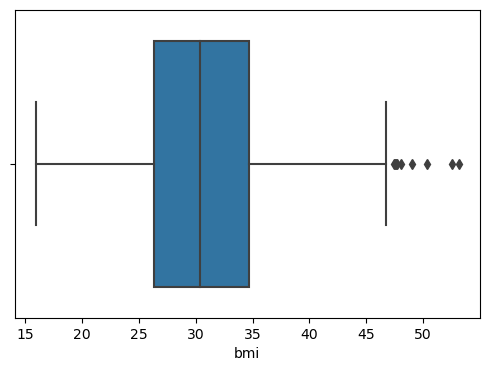

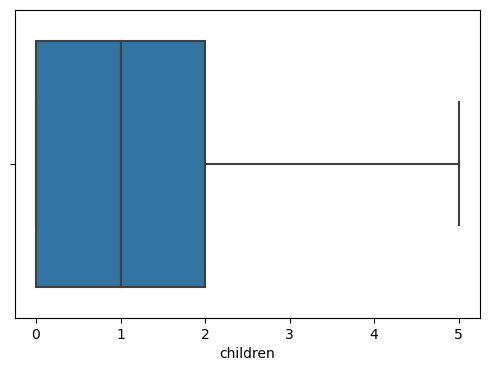

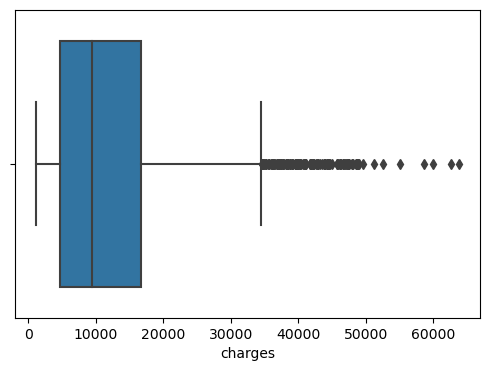

In [17]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])

In [18]:
#charges has outliers and age doesnot have outliers because it is
#normally distributed.

<Axes: >

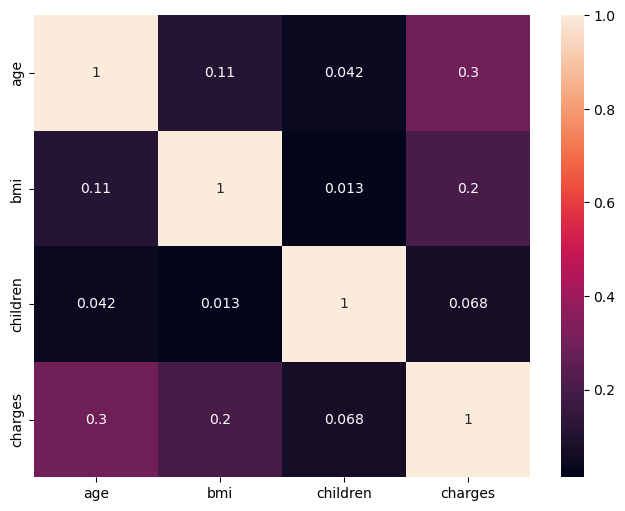

In [19]:
plt.figure(figsize=(8,6))#800*600 pixels size of figure.
sns.heatmap(df.corr(numeric_only=True),annot=True)

sns.heatmap(data, annot=False, cmap='viridis')
plt.show()data → A 2D dataset (like a Pandas DataFrame, NumPy array, or list of lists).
annot (default False) → If True, it writes the actual data values on the cells.
cmap → Color map (e.g., "coolwarm", "viridis", "plasma", "YlGnBu", etc.).
linewidths → Line thickness between cells.
cbar → If True, shows the color bar on the side.

In [20]:
#children is less correlated with others so we can drop it.

# Data cleaning and preprocessing

In [21]:
df_cleaned=df.copy()

In [22]:
df_cleaned.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [23]:
#remove duplicates and also null values.

In [24]:
df_cleaned.shape

(1338, 7)

In [25]:
df_cleaned.drop_duplicates(inplace=True)
#inplace=True
#Normally, drop_duplicates() returns a new DataFrame.
#With inplace=True, it modifies the existing DataFrame directly (no need to assign back).

In [26]:
df_cleaned.shape

(1337, 7)

In [27]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [28]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [29]:
#sex , smoker ,region should be converted to numeric values.

In [30]:
df_cleaned['sex'].value_counts()
#to count the values present inside the sex column.
#like for example male,Male,m,M- these all should considered as 1.

sex
male      675
female    662
Name: count, dtype: int64

In [31]:
#Label encoding. male=0,female=1,numeric
df_cleaned.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [32]:
df_cleaned['sex']=df_cleaned['sex'].map({"male":0,"female":1})
df_cleaned.head()

age  sex     bmi  children smoker     region      charges
0   19    1  27.900         0    yes  southwest  16884.92400
1   18    0  33.770         1     no  southeast   1725.55230
2   28    0  33.000         3     no  southeast   4449.46200
3   33    0  22.705         0     no  northwest  21984.47061
4   32    0  28.880         0     no  northwest   3866.85520

In [33]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [34]:
df_cleaned['smoker']=df_cleaned['smoker'].map({"yes":1,"no":0})

In [35]:
df_cleaned.head()

age  sex     bmi  children  smoker     region      charges
0   19    1  27.900         0       1  southwest  16884.92400
1   18    0  33.770         1       0  southeast   1725.55230
2   28    0  33.000         3       0  southeast   4449.46200
3   33    0  22.705         0       0  northwest  21984.47061
4   32    0  28.880         0       0  northwest   3866.85520

In [36]:
df_cleaned.rename(columns={
    'sex':'is_female',
    'smoker':'is_smoker'
},inplace=True)

In [37]:
df_cleaned.head()

age  is_female     bmi  children  is_smoker     region      charges
0   19          1  27.900         0          1  southwest  16884.92400
1   18          0  33.770         1          0  southeast   1725.55230
2   28          0  33.000         3          0  southeast   4449.46200
3   33          0  22.705         0          0  northwest  21984.47061
4   32          0  28.880         0          0  northwest   3866.85520

In [38]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [39]:
#one hot encoding
df_cleaned=pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)

# -pd.get_dummies()
This function converts categorical variables (like strings or categories) into dummy/indicator variables (0/1).
-columns=['region']
This tells pandas to encode only the region column.
-drop_first=True
This avoids the dummy variable trap (multicollinearity).
It drops the first category and keeps the others.
So instead of creating 3 new columns (East, West, North), it will create 2 columns:
region_West
region_North
(East becomes the baseline and is dropped)
Row 1 & 4 were East → both 0s (baseline)
Row 2 was West → region_West = 1
Row 3 was North → region_North = 1

In [40]:
df_cleaned.head()

age  is_female     bmi  children  is_smoker      charges  region_northwest  \
0   19          1  27.900         0          1  16884.92400             False   
1   18          0  33.770         1          0   1725.55230             False   
2   28          0  33.000         3          0   4449.46200             False   
3   33          0  22.705         0          0  21984.47061              True   
4   32          0  28.880         0          0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False

In [41]:
df_cleaned=df_cleaned.astype(int)

.astype()
In pandas, .astype() is used to change the data type of a column or entire DataFrame.
You pass the desired data type (like int, float, str, etc.) as an argument.

In [42]:
df_cleaned

age  is_female  bmi  children  is_smoker  charges  region_northwest  \
0      19          1   27         0          1    16884                 0   
1      18          0   33         1          0     1725                 0   
2      28          0   33         3          0     4449                 0   
3      33          0   22         0          0    21984                 1   
4      32          0   28         0          0     3866                 1   
...   ...        ...  ...       ...        ...      ...               ...   
1333   50          0   30         3          0    10600                 1   
1334   18          1   31         0          0     2205                 0   
1335   18          1   36         0          0     1629                 0   
1336   21          1   25         0          0     2007                 0   
1337   61          1   29         0          1    29141                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                    1                 0  
3                    0                 0  
4                    0                 0  
...                ...               ...  
1333                 0                 0  
1334                 0                 0  
1335                 1                 0  
1336                 0                 1  
1337                 0                 0  

[1337 rows x 9 columns]

# feature engineering and extraction

<Axes: xlabel='bmi', ylabel='Count'>

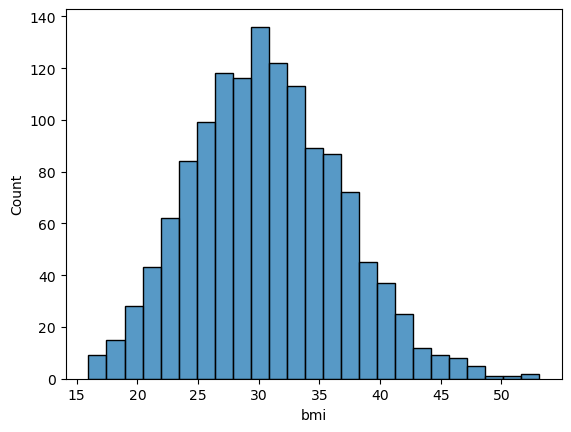

In [43]:
sns.histplot(df['bmi'])

In [44]:
df_cleaned['bmi_category']=pd.cut(
    df_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],
    labels=['Underweight','Normal','Overweight','Obese']
)

pd.cut()
Used to split continuous numeric values into categories (bins).
Perfect for converting BMI numbers into health categories.
bins=[0, 18.5, 24.9, 29.9, float('inf')]
Defines the cutoff points for BMI ranges:
0 → 18.5 → Underweight
18.5 → 24.9 → Normal
25.0 → 29.9 → Overweight
30.0 → ∞ → Obese
labels=['Underweight','Normal','Overweight','Obese']
Assigns category names for each bin.

In [45]:
df_cleaned

age  is_female  bmi  children  is_smoker  charges  region_northwest  \
0      19          1   27         0          1    16884                 0   
1      18          0   33         1          0     1725                 0   
2      28          0   33         3          0     4449                 0   
3      33          0   22         0          0    21984                 1   
4      32          0   28         0          0     3866                 1   
...   ...        ...  ...       ...        ...      ...               ...   
1333   50          0   30         3          0    10600                 1   
1334   18          1   31         0          0     2205                 0   
1335   18          1   36         0          0     1629                 0   
1336   21          1   25         0          0     2007                 0   
1337   61          1   29         0          1    29141                 1   

      region_southeast  region_southwest bmi_category  
0                    0                 1   Overweight  
1                    1                 0        Obese  
2                    1                 0        Obese  
3                    0                 0       Normal  
4                    0                 0   Overweight  
...                ...               ...          ...  
1333                 0                 0        Obese  
1334                 0                 0        Obese  
1335                 1                 0        Obese  
1336                 0                 1   Overweight  
1337                 0                 0   Overweight  

[1337 rows x 10 columns]

In [46]:
#one hot encoding
df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first=True)

In [47]:
 df_cleaned=df_cleaned.astype(int)

In [48]:
df_cleaned.head()

age  is_female  bmi  children  is_smoker  charges  region_northwest  \
0   19          1   27         0          1    16884                 0   
1   18          0   33         1          0     1725                 0   
2   28          0   33         3          0     4449                 0   
3   33          0   22         0          0    21984                 1   
4   32          0   28         0          0     3866                 1   

   region_southeast  region_southwest  bmi_category_Normal  \
0                 0                 1                    0   
1                 1                 0                    0   
2                 1                 0                    0   
3                 0                 0                    1   
4                 0                 0                    0   

   bmi_category_Overweight  bmi_category_Obese  
0                        1                   0  
1                        0                   1  
2                        0                   1  
3                        0                   0  
4                        1                   0

# feature scaling


In [49]:
df_cleaned.columns #age,bmi

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [50]:
from sklearn.preprocessing import StandardScaler
cols=['age','bmi','children']#columns to scale
scaler=StandardScaler()#create the scaler
df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols])

scaler.fit_transform(df_cleaned[cols])
fit() → calculates the mean and standard deviation of each column.
transform() → applies the scaling formula.
fit_transform() → does both in one step.


cols=['age','bmi','children']
You’re selecting the numeric columns you want to scale.
Other columns (like categorical ones) stay untouched.

In [51]:
df_cleaned.head()

age  is_female       bmi  children  is_smoker  charges  \
0 -1.440418          1 -0.517949 -0.909234          1    16884   
1 -1.511647          0  0.462463 -0.079442          0     1725   
2 -0.799350          0  0.462463  1.580143          0     4449   
3 -0.443201          0 -1.334960 -0.909234          0    21984   
4 -0.514431          0 -0.354547 -0.909234          0     3866   

   region_northwest  region_southeast  region_southwest  bmi_category_Normal  \
0                 0                 0                 1                    0   
1                 0                 1                 0                    0   
2                 0                 1                 0                    0   
3                 1                 0                 0                    1   
4                 1                 0                 0                    0   

   bmi_category_Overweight  bmi_category_Obese  
0                        1                   0  
1                        0                   1  
2                        0                   1  
3                        0                   0  
4                        1                   0

# feature selection and extraction:-major features

In [52]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]
#all features should be compared with charges to get correlation.
correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)


Feature  Pearson Correlation
4                 is_smoker             0.787234
0                       age             0.298309
10       bmi_category_Obese             0.200348
1                       bmi             0.196236
6          region_southeast             0.073577
2                  children             0.067390
5          region_northwest            -0.038695
7          region_southwest            -0.043637
3                 is_female            -0.058046
8       bmi_category_Normal            -0.104042
9   bmi_category_Overweight            -0.120601

#-1 to +1.if above +50 or below -50.highly correlated we should use it.

#hit and trial method.

# in categorical features we should apply chi-squared test.

In [53]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

In [54]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05
#charges is numerical we have to create bins for using chi-squared.
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

chi2_statistic   p_value                    Decision
is_smoker                   848.219178       0.0  Reject Null (Keep Feature)
region_southeast             15.998167  0.001135  Reject Null (Keep Feature)
is_female                    10.258784   0.01649  Reject Null (Keep Feature)
bmi_category_Obese            8.515711  0.036473  Reject Null (Keep Feature)
region_southwest              5.091893  0.165191  Accept Null (Drop Feature)
bmi_category_Overweight        4.25149  0.235557  Accept Null (Drop Feature)
bmi_category_Normal           3.708088   0.29476  Accept Null (Drop Feature)
region_northwest               1.13424  0.768815  Accept Null (Drop Feature)

In [55]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi_category_Obese']]
final_df

age  is_female       bmi  children  is_smoker  charges  \
0    -1.440418          1 -0.517949 -0.909234          1    16884   
1    -1.511647          0  0.462463 -0.079442          0     1725   
2    -0.799350          0  0.462463  1.580143          0     4449   
3    -0.443201          0 -1.334960 -0.909234          0    21984   
4    -0.514431          0 -0.354547 -0.909234          0     3866   
...        ...        ...       ...       ...        ...      ...   
1333  0.767704          0 -0.027743  1.580143          0    10600   
1334 -1.511647          1  0.135659 -0.909234          0     2205   
1335 -1.511647          1  0.952670 -0.909234          0     1629   
1336 -1.297958          1 -0.844753 -0.909234          0     2007   
1337  1.551231          1 -0.191145 -0.909234          1    29141   

      region_southeast  bmi_category_Obese  
0                    0                   0  
1                    1                   1  
2                    1                   1  
3                    0                   0  
4                    0                   0  
...                ...                 ...  
1333                 0                   1  
1334                 0                   1  
1335                 1                   1  
1336                 0                   0  
1337                 0                   0  

[1337 rows x 8 columns]

In [56]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

now we have to predict charges

# Linear Regression


In [59]:
from sklearn.model_selection import train_test_split

In [62]:
X=final_df.drop('charges',axis=1)
#drop the output feature in x.
y=final_df['charges']

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model=LinearRegression()#model train
model.fit(X_train,y_train)

LinearRegression()

In [68]:
#evaluation model(model evaluation techniques)
#predictions using y_test
y_pred=model.predict(X_test)


In [70]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)#compare y_test with predicted values.
r2

0.8040712413347118

In [72]:
n=X_test.shape[0]#no of rows
p=X_test.shape[1]#no of columns-1st element
adjusted_r2=1-((1-r2))*(n-1)/(n-p-1)
adjusted_r2

0.7987962362937232